## RGBD images

In [1]:
import open3d as o3d
print(o3d.__version__)
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
0.17.0


# Redwood dataset

In [27]:
print("Read Redwood dataset")
redwood_rgbd = o3d.data.SampleRedwoodRGBDImages()
color_raw = o3d.io.read_image(redwood_rgbd.color_paths[0]) # This is the path to the first color image in the dataset.
depth_raw = o3d.io.read_image(redwood_rgbd.depth_paths[0]) # This is the path to the first depth image in the dataset.

#  Bellow function combines the color image and depth image into a single RGBDImage. 
#The color image is converted to grayscale and scaled to float values in the range [0, 1].
# The depth image is stored as float values in meters.
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw) 
print(rgbd_image)

Read Redwood dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


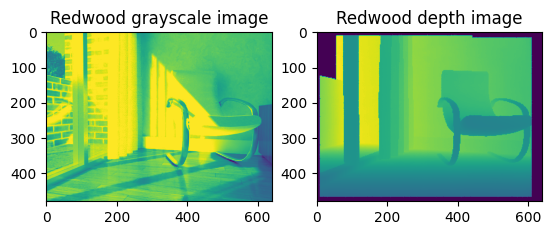

In [28]:
## Converting RGBD Images to Numpy Arrays

import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)  # creating a subplot (row, col, grid to create i.e 1) 1*2
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color) # it is a 2D array that represents the color information (in grayscale after being converted).
plt.subplot(1, 2, 2)  # creating a subplot (row, col, grid to create i.e 2)  1*2
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)   # Refers to the depth part of the RGBD image
plt.show() 

In [29]:
## Converting the RGBD Image to a Point Cloud


pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)) # this Defines the camera parameters used for projection.

# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

In [30]:
## Explaniation of above code

## SUN dataset

In [31]:
print("Read SUN dataset")
sun_rgbd = o3d.data.SampleSUNRGBDImage()
color_raw = o3d.io.read_image(sun_rgbd.color_path)
depth_raw = o3d.io.read_image(sun_rgbd.depth_path)
rgbd_image = o3d.geometry.RGBDImage.create_from_sun_format(color_raw, depth_raw)
print(rgbd_image)

Read SUN dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


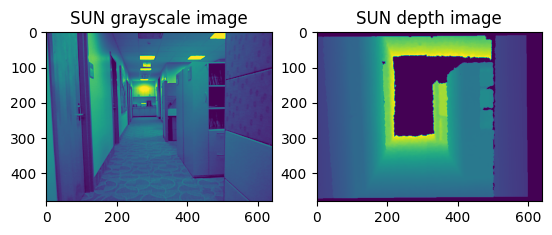

In [32]:
plt.subplot(1, 2, 1)
plt.title('SUN grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('SUN depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [33]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

## NYU dataset

In [34]:
import matplotlib.image as mpimg ## Used to read the color image.
import re ##  Helps extract metadata from the PGM depth file.


# This is special function used for reading NYU pgm format
# as it is written in big endian byte order.
def read_nyu_pgm(filename, byteorder='>'):
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    img = np.frombuffer(buffer,                                  # Converts binary data into a NumPy array (np.frombuffer()).
                        dtype=byteorder + 'u2',
                        count=int(width) * int(height),
                        offset=len(header)).reshape((int(height), int(width)))
    img_out = img.astype('u2')
    return img_out


print("Read NYU dataset")
# Open3D does not support ppm/pgm file yet. Not using o3d.io.read_image here.
# MathplotImage having some ISSUE with NYU pgm file. Not using imread for pgm.
nyu_rgbd = o3d.data.SampleNYURGBDImage()
color_raw = mpimg.imread(nyu_rgbd.color_path) # Reads the color image using mpimg.imread() (returns a NumPy array).
depth_raw = read_nyu_pgm(nyu_rgbd.depth_path) # Reads the depth image using the custom read_nyu_pgm() function.
color = o3d.geometry.Image(color_raw)
depth = o3d.geometry.Image(depth_raw)
rgbd_image = o3d.geometry.RGBDImage.create_from_nyu_format(color, depth)
print(rgbd_image)

Read NYU dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


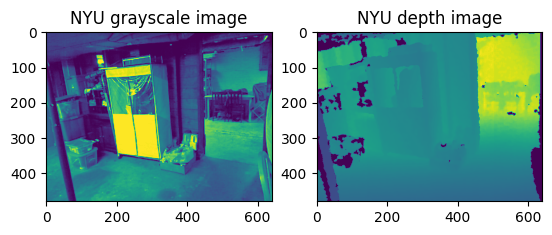

In [35]:
plt.subplot(1, 2, 1)
plt.title('NYU grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('NYU depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [36]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

## TUM dataset

In [42]:
print("Read TUM dataset")
tum_rgbd = o3d.data.SampleSUNRGBDImage()
color_raw = o3d.io.read_image(tum_rgbd.color_path)
depth_raw = o3d.io.read_image(tum_rgbd.depth_path)
rgbd_image = o3d.geometry.RGBDImage.create_from_tum_format(color_raw, depth_raw)
print(rgbd_image)

Read TUM dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


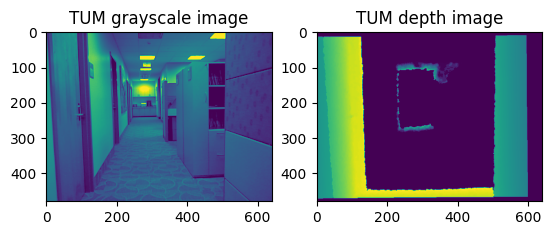

In [38]:
plt.subplot(1, 2, 1)
plt.title('TUM grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('TUM depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [39]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

Image of size 640x480, with 3 channels.
Use numpy.asarray to access buffer data.
